<a href="https://colab.research.google.com/github/ttadesusi/CO2-Emission-Prediction-from-Light-Vehicles-in-Canada/blob/main/CO2_Emmision_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CO2 EMMISSION ANALYSIS OF NEW LIGHT-DUTY VEHICLES IN CANADA**



---

## Understanding the Data
*Dataset: FuelConsumption.csv*

*This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
The dataset attributes are:*
* MODELYEAR
* MAKE 
* MODEL
* VEHICLE CLASS
* ENGINE SIZE
* CYLINDERS
* TRANSMISSION
* FUEL CONSUMPTION in CITY(L/100 km)
* FUEL CONSUMPTION in HWY (L/100 km)
* FUEL CONSUMPTION COMB (L/100 km)
* CO2 EMISSIONS (g/km) 


In [1]:
# Import packages

import pandas as pd   # dataframe library
import numpy as np    # array library

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Acquisition

In [2]:
# Read a csv dataset from a link into pandas dataframe

data_link = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(data_link)

In [3]:
# Show top 5 rows in the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Descriptive Summary

In [4]:
# summary statistics

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [5]:
print(df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", df.shape[0], "and", "Number of columns (attributes)" , "df.shape[1]")  # Number of rows and column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

### Skewness and Kurtosis

*Skewness is a measure of the asymmetry of a data distribution, while kurtosis is a measure of the peakedness of a data distribution. Both measures can help identify underlying patterns in data that can indicate potential outliers or errors in data collection.*

In [6]:
print(df.skew(), "\n") #skewness
print(df.kurtosis())  #kurtosis

MODELYEAR                   0.000000
ENGINESIZE                  0.567842
CYLINDERS                   0.795754
FUELCONSUMPTION_CITY        0.900629
FUELCONSUMPTION_HWY         1.263859
FUELCONSUMPTION_COMB        1.032592
FUELCONSUMPTION_COMB_MPG    0.585409
CO2EMISSIONS                0.519515
dtype: float64 

MODELYEAR                   0.000000
ENGINESIZE                 -0.538022
CYLINDERS                   0.478801
FUELCONSUMPTION_CITY        0.951412
FUELCONSUMPTION_HWY         1.889409
FUELCONSUMPTION_COMB        1.230031
FUELCONSUMPTION_COMB_MPG    0.747321
CO2EMISSIONS               -0.109553
dtype: float64


<ipython-input-6-71227260a831>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew(), "\n") #skewness
<ipython-input-6-71227260a831>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.kurtosis())  #kurtosis


## Defining Independent (predictors) and Dependent (target or response) Variables

*The dataset contains 8 columns (attributes). CO2EMISSIONS column is the target variable (Y) while other columns will be the independent variables (X). MODELYEAR column will be removed from predictor variables because it has only 1 distinct data value (2014). FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY will also be removed from the predictor variables. This is because FUELCONSUMPTION_COMB or FUELCONSUMPTION_COMB_MPG represents the average of the two variables.*

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>, <Axes: >]],
      dtype=object)

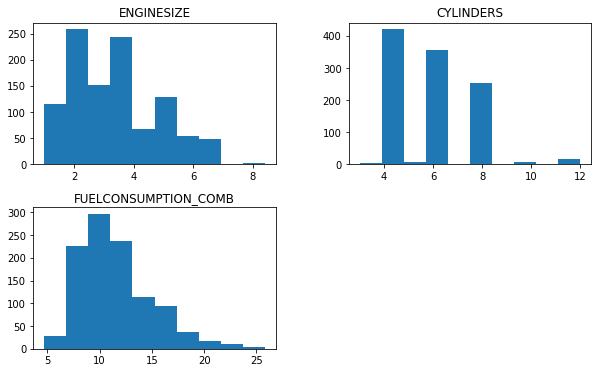

In [7]:
# Histogram plot to check the distribution of the data
X = df[['ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE','FUELCONSUMPTION_COMB']]
X.hist(figsize=(10,6), grid = False)

<Axes: >

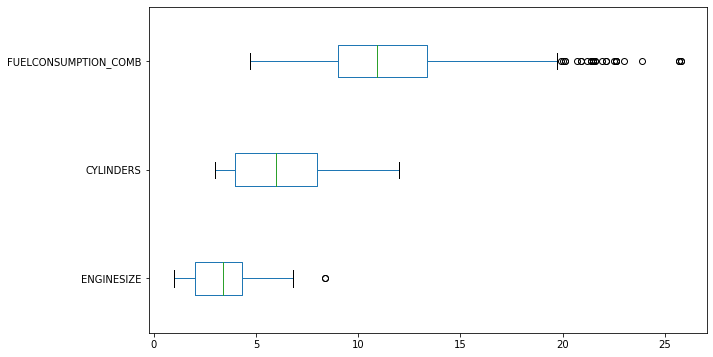

In [8]:
X.boxplot(figsize=(10,6), vert = False, grid = False)

## Correlation Analysis

*Correlation analysis is a statistical technique used to determine the strength and direction of the relationship between two or more variables. It is a widely used technique in business to identify and quantify relationships between different business metrics.*



### Correlation between Continuous Variables.

*Target variable (CO2EMISSIONS) will be correlated with independent variables with continuous data values e.g ENGINESIZE and FUELCONSUMPTION_COMB. The appropriate correlation technique for this type of data is pearson correlation.*



In [9]:
# Import Pearson correlation package

from scipy.stats import pearsonr

In [10]:
pearson_corr1, pearson_p1 = pearsonr(df["ENGINESIZE"], df['CO2EMISSIONS'])
pearson_corr2, pearson_p2 = pearsonr(df["FUELCONSUMPTION_COMB"], df['CO2EMISSIONS'])

print("Pearson correlation coeffient for CO2 emission and Engine size is", pearson_corr1.round(2), "and the p-value is", pearson_p1)
print("Pearson correlation coeffient for CO2 emission and fuel consumption is", pearson_corr2.round(2), "and the p-value is", pearson_p2)

Pearson correlation coeffient for CO2 emission and Engine size is 0.87 and the p-value is 0.0
Pearson correlation coeffient for CO2 emission and fuel consumption is 0.89 and the p-value is 0.0


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

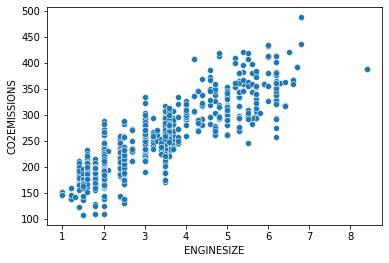

In [11]:
# Displaying relatioship between C02 emission and Engine size

sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

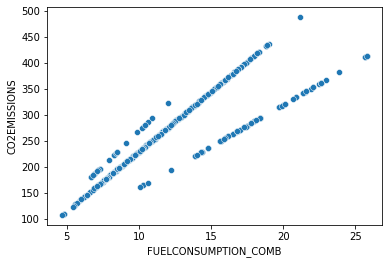

In [12]:
# Displaying relatioship between C02 emission and Fuel consumption

sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)

### Correlation between Ordinal and Continuous Variables.

*Target variable (CO2EMISSIONS) will be correlated with an independent variable with ordinal data values e.g Cylinders. The appropriate correlation technique for this type of data is spearman or kendall correlation.*



In [13]:
# Importing spearman and kendalls correlation package

from scipy.stats import spearmanr, kendalltau

In [14]:
spearman_corr, spearman_p = spearmanr(df["CYLINDERS"], df["CO2EMISSIONS"])
kendall_corr, kendall_p = kendalltau(df["CYLINDERS"], df["CO2EMISSIONS"])

print("Spearman correlation coeffient for CO2 emission and cylinder is", spearman_corr.round(2), "and the p-value is", spearman_p)
print("Kendall correlation coeffient for CO2 emission and cylinder is", kendall_corr.round(2), "and the p-value is", kendall_p)

Spearman correlation coeffient for CO2 emission and cylinder is 0.88 and the p-value is 0.0
Kendall correlation coeffient for CO2 emission and cylinder is 0.75 and the p-value is 7.636791331332124e-222


<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

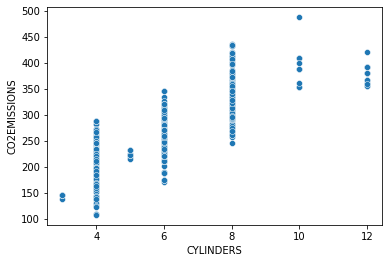

In [15]:
# Displaying relatioship between C02 emission and Fuel consumption

sns.scatterplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)

### Correlation between Categorical (non-binary) and Continuous Variables.

*Target variable (CO2EMISSIONS) will be correlated with independent variables with categorical data values e.g MAKE,	MODEL,	VEHICLECLASS,	ENGINESIZE,	TRANSMISSION, FUELTYPE.*

*Assumming vehicle make and class do not effect or contribute to CO2 emission. We will only check if FuelType and Transmission are related to CO2 emission.*

*The appropriate correlation technique for this type of data is Biserial or Point Biserial correlation.*

In [16]:
# Importing Biserial correlation package

from scipy.stats import pointbiserialr

In [17]:
#Checking data values for Fuel Type and Transmission
x1 = df['FUELTYPE'].value_counts()
x2 = df['TRANSMISSION'].value_counts()

print(x1)
print()
print(x2)

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64


In [18]:
# Converting to arrays for one hot encoding

X = df[['ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE','FUELCONSUMPTION_COMB']].values
X[0:5]

array([[2.0, 4, 'AS5', 'Z', 8.5],
       [2.4, 4, 'M6', 'Z', 9.6],
       [1.5, 4, 'AV7', 'Z', 5.9],
       [3.5, 6, 'AS6', 'Z', 11.1],
       [3.5, 6, 'AS6', 'Z', 10.6]], dtype=object)

In [19]:
# Onehot encoding using label encoder to change string or categorical to numeric

from sklearn import preprocessing
le_trans = preprocessing.LabelEncoder()
le_trans.fit(['A6','AS6','M6','A8','AS8','AS7','M5','AV','A4','AM7','A5','A7','AV6','AS5','M7','A9','AM6','AV7','AV8','AS9','AM5','AS4' ])
X[:,2] = le_trans.transform(X[:,2]) 

le_fuel = preprocessing.LabelEncoder()
le_fuel.fit(['D','E', 'X', 'Z']) 
X[:,3] = le_fuel.transform(X[:,3])

X[0:5]

array([[2.0, 4, 10, 3, 8.5],
       [2.4, 4, 20, 3, 9.6],
       [1.5, 4, 17, 3, 5.9],
       [3.5, 6, 11, 3, 11.1],
       [3.5, 6, 11, 3, 10.6]], dtype=object)

In [20]:
# Converting the encoded X into pandas dataframe and adding headers

X = pd.DataFrame(X)
X.columns = ['ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE','FUELCONSUMPTION_COMB']
X.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB
0,2.0,4,10,3,8.5
1,2.4,4,20,3,9.6
2,1.5,4,17,3,5.9
3,3.5,6,11,3,11.1
4,3.5,6,11,3,10.6


In [21]:
corr1, pval1 = pointbiserialr(X['FUELTYPE'], df['CO2EMISSIONS'])
corr2, pval2 = pointbiserialr(X['TRANSMISSION'], df['CO2EMISSIONS'])

print("Biserial correlation coeffient for CO2 emission and Fuel is", corr1.round(2), "and the p-value is", pval1)
print("Biserial correlation coeffient for CO2 emission and transmission is", corr2.round(2), "and the p-value is", pval2)


Biserial correlation coeffient for CO2 emission and Fuel is 0.08 and the p-value is 0.014052252196548785
Biserial correlation coeffient for CO2 emission and transmission is -0.3 and the p-value is 1.5481800462222164e-23


## Feature Selection

*Based on correlation analysis, the independent variables that are related with the target variable are EngineSize, No_of_Cylinders, and FuelConsumption.*

In [22]:
# Defining single variable for linear regression

x1 = X[['ENGINESIZE']]
x2 = X[['CYLINDERS']]
x3 = X[['FUELCONSUMPTION_COMB']]

X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y = df['CO2EMISSIONS']

## Model Building and Model Accuracy Measurement

The following argorithms will be use on this dataset: Linear Regression, Multiple Linear Regression, and Polynomial Regression.


In [23]:
# Import packages for model building and accuracy measurement

from sklearn.linear_model import LinearRegression     # for Linear & Multiple Regression
from sklearn.preprocessing import PolynomialFeatures  # for Polynomial Regression


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for measuring the accuracy of the measurement

from math import sqrt 

### Spliting Dataset into Train and Test **Data**
80% Train Data \
20% Test Data

In [24]:
# Importing split package
from sklearn.model_selection import train_test_split  

# Splitting dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, Y, test_size=0.2, random_state=10)  # data split for engine size
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, Y, test_size=0.2, random_state=22)  # data split for no of cylinders
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, Y, test_size=0.2, random_state=1)   # data split for fuel consumption

print("Number of x1 train samples:",x1_train.shape[0], "and number of x1 test samples :", x1_test.shape[0], '\n')
print("Number of x2 train samples:",x2_train.shape[0], "and number of x2 test samples :", x2_test.shape[0], '\n')
print("Number of x1 train samples:",x3_train.shape[0], "and number of x3 test samples :", x3_test.shape[0])

Number of x1 train samples: 853 and number of x1 test samples : 214 

Number of x2 train samples: 853 and number of x2 test samples : 214 

Number of x1 train samples: 853 and number of x3 test samples : 214


### Linear Regression

In [25]:
# Fitting a Linear Model on train data
lr1 = LinearRegression()
lr1.fit(x1_train,y1_train)

lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)

lr3 = LinearRegression()
lr3.fit(x3_train,y3_train)

# Making prediction on test data
y1_pred = lr1.predict(x1_test)
y2_pred = lr2.predict(x2_test)
y3_pred = lr3.predict(x3_test)

# Displaying model parameters
print('y1 intercept:', lr1.intercept_, 'and', 'y1 cofficient:', lr1.coef_, '\n')
print('y2 intercept:', lr2.intercept_, 'and', 'y2 cofficient:', lr2.coef_, '\n')
print('y3 intercept:', lr3.intercept_, 'and', 'y3 cofficient:', lr3.coef_)

y1 intercept: 124.10132175538084 and y1 cofficient: [39.39918757] 

y2 intercept: 85.40187576752157 and y2 cofficient: [29.5080983] 

y3 intercept: 67.21269924070313 and y3 cofficient: [16.33711954]


In [26]:
print('The following are the accuracy values of the ML model that uses engine size as the only predictor')
print('R-squared: %.2f'% r2_score(y1_test, y1_pred), \
      '|', 'MSE: %.2f'% mean_squared_error(y1_test, y1_pred), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(y1_test, y1_pred)), \
      '|','MAE: %.2f'% (mean_absolute_error(y1_test, y1_pred)), '\n')

print('The following are the accuracy values of the ML model that uses no of cylinders as the only predictor')
print('R-squared: %.2f'% r2_score(y2_test, y2_pred), \
      '|', 'MSE: %.2f'% mean_squared_error(y2_test, y2_pred), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(y2_test, y2_pred)), \
      '|','MAE: %.2f'% (mean_absolute_error(y2_test, y2_pred)), '\n')

print('The following are the accuracy values of the ML model that uses fuel consumption as the only predictor')
print('R-squared: %.2f'% r2_score(y3_test, y3_pred), \
      '|', 'MSE: %.2f'% mean_squared_error(y3_test, y3_pred), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(y3_test, y3_pred)), \
      '|','MAE: %.2f'% (mean_absolute_error(y3_test, y3_pred)))
     
     

The following are the accuracy values of the ML model that uses engine size as the only predictor
R-squared: 0.72 | MSE: 1177.13 | RMSE:34.31 | MAE: 26.08 

The following are the accuracy values of the ML model that uses no of cylinders as the only predictor
R-squared: 0.71 | MSE: 1123.26 | RMSE:33.52 | MAE: 25.47 

The following are the accuracy values of the ML model that uses fuel consumption as the only predictor
R-squared: 0.79 | MSE: 857.80 | RMSE:29.29 | MAE: 20.50


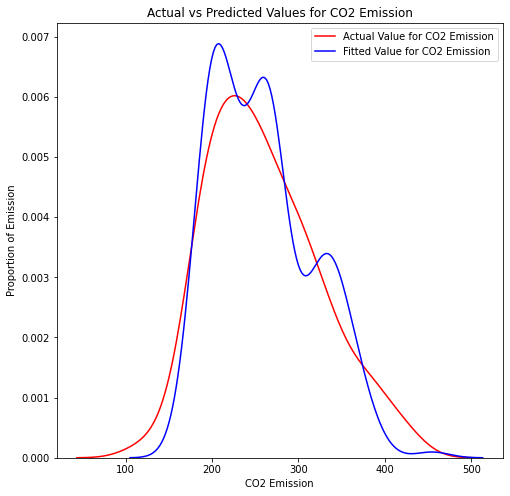

In [27]:
# Displaying linear regression model fitting using Engine Size as Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(y1_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(y1_pred, color="b", label="Fitted Value for CO2 Emission" , ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

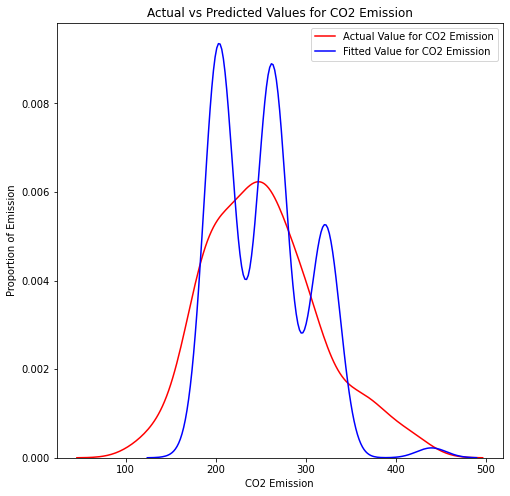

In [28]:
# Displaying linear regression model fitting using no of Cylinders as Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(y2_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(y2_pred, color="b", label="Fitted Value for CO2 Emission", ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

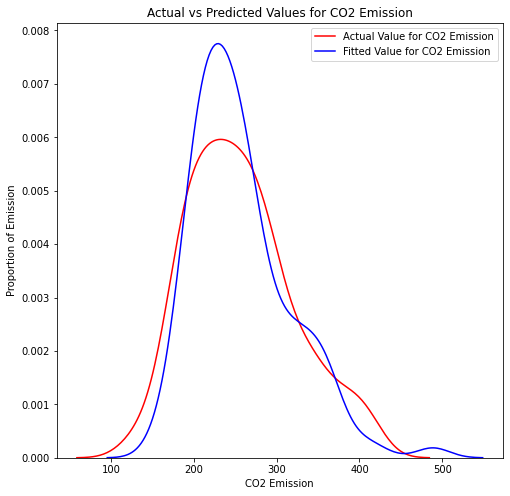

In [29]:
# Displaying linear regression model fitting using Fuel Consumption as Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(y3_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(y3_pred, color="b", label="Fitted Value for CO2 Emission", ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

### Multiple Linear Regression

In [30]:
# Splitting dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)  # data split for all the 3 independent variables and target variable

print("Number of train samples:",X_train.shape[0], "and number of test samples :", X_test.shape[0], '\n')

Number of train samples: 853 and number of test samples : 214 



In [31]:
# Fitting a Linear Model on train data
lr = LinearRegression()
lr.fit(X_train,Y_train)

# Making prediction on test data
Y_pred1 = lr.predict(X_test)

# Displaying model parameters
print('Intercept:', lr.intercept_, 'and', 'Cofficients:', lr.coef_)

Intercept: 67.51291399733583 and Cofficients: [11.88860558  7.31675476  9.16732461]


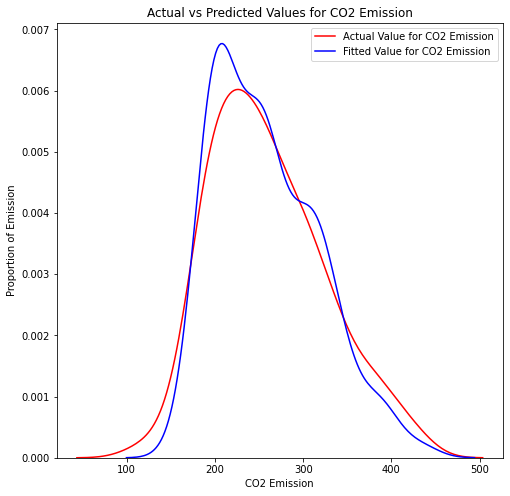

In [32]:
# Displaying multiple linear regression model fitting using 3 Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(Y_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(Y_pred1, color="b", label="Fitted Value for CO2 Emission" , ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

In [33]:
print('The following are the accuracy values of the multiple linear regression  model')
print('R-squared: %.2f'% r2_score(Y_test, Y_pred1), \
      '|', 'MSE: %.2f'% mean_squared_error(Y_test, Y_pred1), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(Y_test, Y_pred1)), \
      '|','MAE: %.2f'% (mean_absolute_error(Y_test, Y_pred1)))


The following are the accuracy values of the multiple linear regression  model
R-squared: 0.87 | MSE: 526.69 | RMSE:22.95 | MAE: 16.91


### Polynomial Regression

In [34]:
# Fitting a Polynomial Model on train data

pr = PolynomialFeatures(degree = 3)
Xpr_train = pr.fit_transform(X_train)
Xpr_test = pr.fit_transform(X_test)

lr.fit(Xpr_train, Y_train)

# # Making prediction on test data
Y_pred2 = lr.predict(Xpr_test)

In [35]:
print('The following are the accuracy values of the polynomial regression  model')
print('R-squared: %.2f'% r2_score(Y_test, Y_pred2), \
      '|', 'MSE: %.2f'% mean_squared_error(Y_test, Y_pred2), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(Y_test, Y_pred2)), \
      '|','MAE: %.2f'% (mean_absolute_error(Y_test, Y_pred2)))


The following are the accuracy values of the polynomial regression  model
R-squared: 0.92 | MSE: 318.58 | RMSE:17.85 | MAE: 11.72


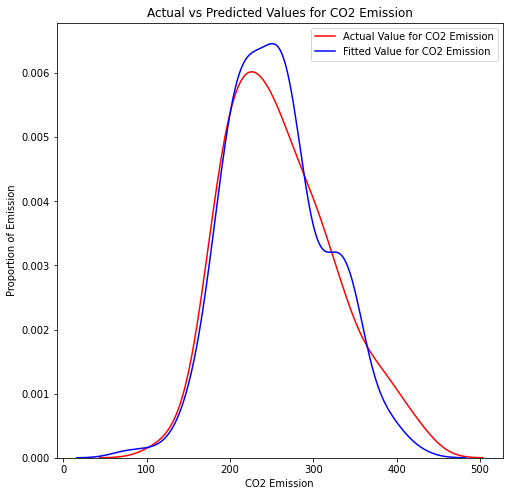

In [36]:
# Displaying polynomial regression model fitting using 3 Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(Y_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(Y_pred2, color="b", label="Fitted Value for CO2 Emission" , ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

### Decision Tree Regression

In [37]:
# Importing DecisionTree Regression Package

from sklearn.tree import DecisionTreeRegressor

In [38]:
# Fitting a DecisionTree Regression Tree Model on train data
regTree = DecisionTreeRegressor()
regTree.fit(X_train,Y_train)

# Making prediction on test data
Y_pred3 = regTree.predict(X_test)

In [39]:
print('The following are the accuracy values of the DecisionTree regression  model')
print('R-squared: %.2f'% r2_score(Y_test, Y_pred3), \
      '|', 'MSE: %.2f'% mean_squared_error(Y_test, Y_pred3), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(Y_test, Y_pred3)), \
      '|','MAE: %.2f'% (mean_absolute_error(Y_test, Y_pred3)))

The following are the accuracy values of the DecisionTree regression  model
R-squared: 0.96 | MSE: 176.96 | RMSE:13.30 | MAE: 3.17


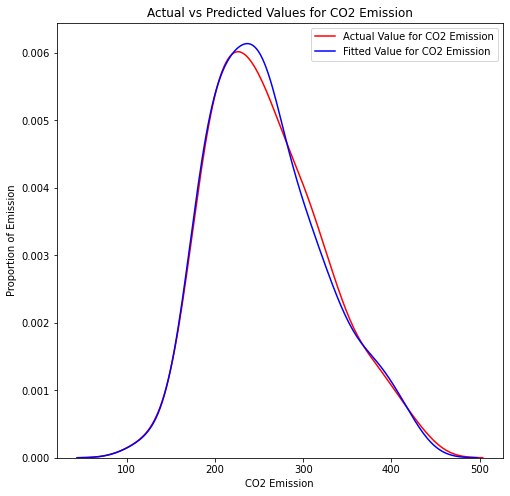

In [40]:
# Displaying Decision Tree Regression model fitting using 3 Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(Y_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(Y_pred3, color="b", label="Fitted Value for CO2 Emission" , ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

### Random Forest Regressor

In [41]:
# Importing RandomForest Regression Package

from sklearn.ensemble import RandomForestRegressor

In [42]:
# Fitting a Ramdom Forest Regression Tree Model on train data
rfReg = RandomForestRegressor()
rfReg.fit(X_train,Y_train)

# Making prediction on test data
Y_pred4 = rfReg.predict(X_test)

In [43]:
print('The following are the accuracy values of the RandomForest Regressor model')
print('R-squared: %.2f'% r2_score(Y_test, Y_pred4), \
      '|', 'MSE: %.2f'% mean_squared_error(Y_test, Y_pred4), \
      '|','RMSE:%.2f'% sqrt(mean_squared_error(Y_test, Y_pred4)), \
      '|','MAE: %.2f'% (mean_absolute_error(Y_test, Y_pred4)))

The following are the accuracy values of the RandomForest Regressor model
R-squared: 0.96 | MSE: 180.67 | RMSE:13.44 | MAE: 4.13


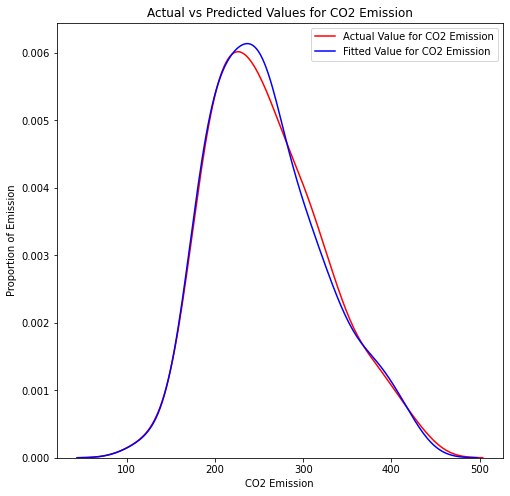

In [44]:
# Displaying Ramdom Forest Regression model fitting using 3 Independent variable

width=8
height=8

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(Y_test, color="r", label="Actual Value for CO2 Emission")
ax = sns.kdeplot(Y_pred3, color="b", label="Fitted Value for CO2 Emission" , ax = ax1)


plt.title('Actual vs Predicted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Emission')
plt.legend()

plt.show()
plt.close()

### Comparing Model Accuracy with Cross Validation

In [45]:
# Importing cross validation package
from sklearn.model_selection import cross_val_score, KFold

# Randomizing and splitting data with KFold
kf = KFold(5, shuffle=True, random_state=2)

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

def compare_models_cross_validation():
  for model in models:
    cvscore = cross_val_score(model, X, Y, cv=kf)
    mean_cvscore = cvscore.mean()
    print('Accuracy of the', model,'is',mean_cvscore.round(2),'\n')



In [46]:
compare_models_cross_validation()

Accuracy of the LinearRegression() is 0.86 

Accuracy of the DecisionTreeRegressor() is 0.95 

Accuracy of the RandomForestRegressor() is 0.96 



## Comparing the values of predicted and actual CO emission - using the Multilinear Regression, Polynomial Regression and Decision Tree Regression on the Test Data

In [47]:
# Converting X test data to pandas dataframe and reset the index or row number.
X_test = pd.DataFrame(X_test)
X_test.reset_index(drop = True, inplace = True)

# Converting Y test data to pandas dataframe and reset the index or row number.
Y_test = pd.DataFrame(Y_test)
Y_test.reset_index(drop = True, inplace = True)

# Converting Y predicted data to pandas dataframe and reset the index or row number.
Y_pred1 = pd.DataFrame(Y_pred1)
Y_pred1.columns = ['MultiReg_CO2EMISSION']

Y_pred2 = pd.DataFrame(Y_pred2)
Y_pred2.columns = ['PolyReg_CO2EMISSION']

Y_pred3 = pd.DataFrame(Y_pred3)
Y_pred3.columns = ['RegTree_CO2EMISSION']

Y_pred4 = pd.DataFrame(Y_pred4)
Y_pred4.columns = ['RamForest_CO2EMISSION']

# Combining X, Y, and predicted Y 
df_new = pd.concat([X_test, Y_test, Y_pred1.round(), \
                                    Y_pred2.round(), \
                                    Y_pred3.round(), \
                                    Y_pred4.round()], axis = 1)

# Printing first 5 rows                     
df_new.head()   

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,MultiReg_CO2EMISSION,PolyReg_CO2EMISSION,RegTree_CO2EMISSION,RamForest_CO2EMISSION
0,1.6,4,7.6,175,185.0,178.0,175.0,175.0
1,3.0,6,11.5,264,253.0,263.0,264.0,264.0
2,3.2,6,11.6,267,256.0,263.0,267.0,267.0
3,2.0,4,10.0,230,212.0,223.0,230.0,230.0
4,3.5,6,10.4,239,248.0,247.0,239.0,239.0
